In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn import preprocessing

from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [2]:
#features = pd.read_csv("../data/interim/features.csv")
#features = features.drop(["seborrheic_keratosis"], axis=1)

norm_features = pd.read_csv("../data/interim/norm_features.csv")
norm_features = norm_features.drop(["seborrheic_keratosis"], axis=1)

mask = norm_features["melanoma"] == 1.0
mask_2 = norm_features["melanoma"] == 0.0
melanoma = norm_features[mask]
non_melanoma = norm_features[mask_2] 

print(melanoma.shape)
print(non_melanoma.shape)
print(norm_features.head())

(30, 10)
(120, 10)
       image_id  melanoma    Perimeter          Area  Norm_Compactness  \
0  ISIC_0001769       0.0  1402.898071  27884.892578          0.476510   
1  ISIC_0001852       0.0   996.160828  16833.162109          0.397999   
2  ISIC_0001871       0.0  1254.980469  26459.980469          0.401858   
3  ISIC_0003462       0.0   993.333435  20858.333984          0.319373   
4  ISIC_0003539       0.0  1495.137085  40898.136719          0.369017   

   Norm_Asymmetry         Red       Green        Blue  Norm_Average Color  
0        0.383144  161.351912   98.294626   66.663295            0.576044  
1        0.313298  114.963288   52.560685   31.287556            0.350968  
2        0.183044  182.040832  134.189761  101.775074            0.737918  
3        0.185313  165.370006  115.710884   86.316572            0.648577  
4        0.519001  164.644890   98.939135   62.516376            0.575675  


In [3]:
melanoma.describe()

,melanoma,Perimeter,Area,Norm_Compactness,Norm_Asymmetry,Red,Green,Blue,Norm_Average Color
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.0,3790.528652,218439.774544,0.526054,0.354945,152.112046,95.380102,76.099210,0.571245
std,0.0,2101.432065,188422.403435,0.159852,0.161907,27.215177,23.436319,22.597635,0.121221
min,1.0,877.650940,11564.650391,0.257757,0.152182,100.902182,30.876381,19.926722,0.267810
25%,1.0,1841.668579,59117.959961,0.452978,0.246751,132.667085,81.142712,65.033278,0.483490
50%,1.0,3770.362671,174897.117188,0.511442,0.305228,154.278103,101.977409,75.562569,0.598074
75%,1.0,5161.428955,295898.632812,0.616720,0.425081,169.673723,108.781247,88.224003,0.659639
max,1.0,8469.986328,664879.250000,0.845933,0.758629,208.186555,126.368279,123.209718,0.761879


In [4]:
non_melanoma.describe()

,melanoma,Perimeter,Area,Norm_Compactness,Norm_Asymmetry,Red,Green,Blue,Norm_Average Color
count,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.0,2476.494800,115811.303768,0.465205,0.331630,158.839912,109.411139,88.958500,0.630592
std,0.0,1983.755657,158248.200467,0.144189,0.164249,28.315177,29.004480,30.335286,0.147674
min,0.0,471.862762,4306.862793,0.259717,0.075716,71.707453,50.757423,29.716522,0.289695
25%,0.0,1204.074524,22637.168457,0.326852,0.202478,142.266933,92.338276,65.778740,0.536683
50%,0.0,1729.780396,50295.779297,0.467134,0.312045,163.068577,111.629404,90.197705,0.637059
75%,0.0,2876.515137,120190.548828,0.533631,0.430163,175.703293,127.607666,107.538516,0.725381
max,0.0,10506.941406,745316.875000,1.000000,1.000000,212.703496,176.722548,177.040511,1.000000


<AxesSubplot:>

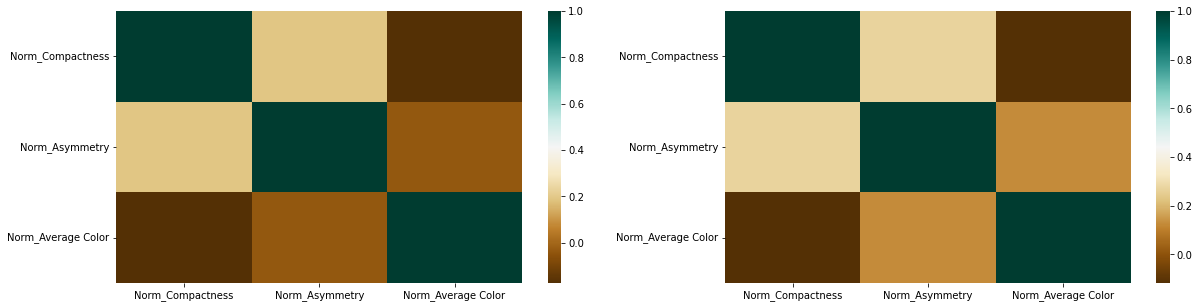

In [5]:
fig, ax = plt.subplots(1,2, figsize = (20,5))

a = melanoma.drop(["melanoma", "Red", "Blue", "Green", "Area", "Perimeter"], axis = 1)
sns.heatmap(a.corr(), cmap = "BrBG", ax = ax[0])

b = non_melanoma.drop(["melanoma", "Red", "Blue", "Green", "Area", "Perimeter"], axis = 1)
sns.heatmap(b.corr(), cmap = "BrBG", ax = ax[1])

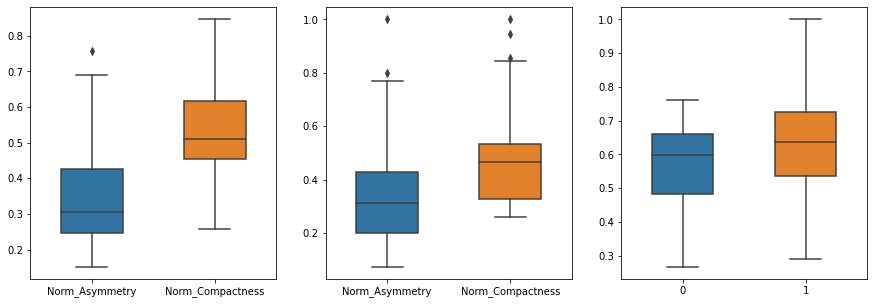

In [12]:
### using boxplots to see the distribution of different measures

fig, ax = plt.subplots(1,3,figsize=(15,5))

x = sns.boxplot(ax = ax[0], data = melanoma[["Norm_Asymmetry","Norm_Compactness"]], width=0.5)
y = sns.boxplot(ax = ax[1], data = non_melanoma[["Norm_Asymmetry","Norm_Compactness"]], width=0.5)
z = sns.boxplot(ax = ax[2], data = (melanoma[["Norm_Average Color"]], non_melanoma[["Norm_Average Color"]]), width=0.5)

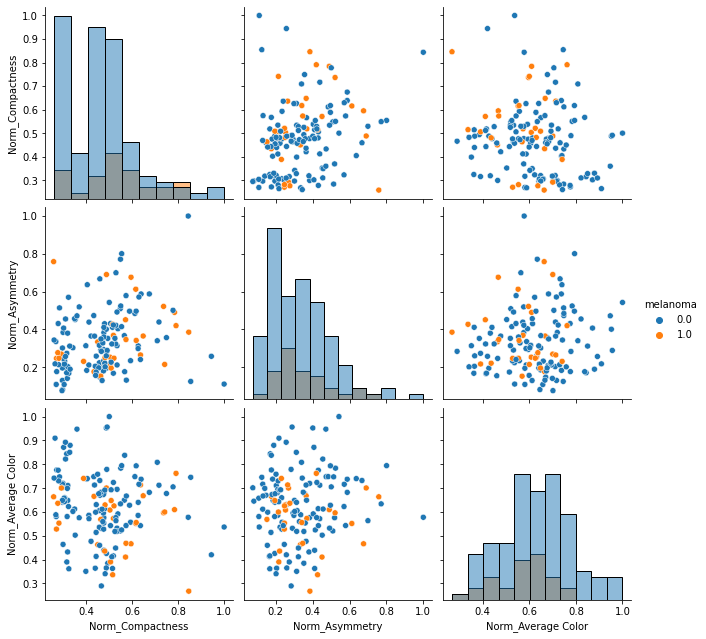

In [9]:
sns.pairplot(norm_features[["Norm_Compactness","Norm_Asymmetry","Norm_Average Color", "melanoma"]], hue="melanoma", height=3, diag_kind="hist")

<AxesSubplot:xlabel='melanoma', ylabel='Norm_Average Color'>

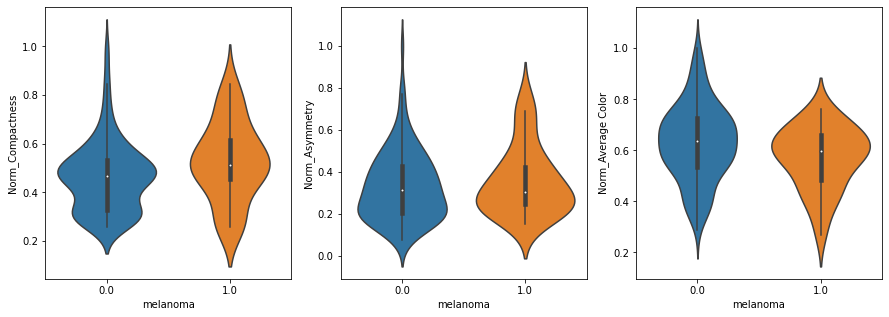

In [10]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.violinplot(ax = ax[0], x="melanoma", y="Norm_Compactness", data=norm_features, size=8)
sns.violinplot(ax = ax[1], x="melanoma", y="Norm_Asymmetry", data=norm_features, size=8)
sns.violinplot(ax = ax[2], x="melanoma", y="Norm_Average Color", data=norm_features, size=8)